<img src="http://oproject.org/tiki-download_file.php?fileId=8&display&x=450&y=128">
<img src="http://files.oproject.org/tmvalogo.png" height="50%" width="50%">

# TMVA  Training Example 

#### This an example of training TMVA classifiers on a Higgs data set

We are going to use an extract of the UCI public Higgs data set. See https://archive.ics.uci.edu/ml/datasets/HIGGS.
To mantain the problem simple we will use just the high level features of the data set.

We will run this example using Python and using the add-on JSMVA (Javascript enhanchments for TMVA) which works only in the notebook. 

In [1]:
import ROOT
from ROOT import TMVA

Welcome to JupyROOT 6.13/01


### Enable JS visualization
To use new interactive features in notebook we have to enable a module called JsMVA. This can be done by using ipython magic: %jsmva.

Due to a current problem with importing ROOT in the latest release, we use this temporary workaround (two lines below). They will not be needed in the future

In [2]:
from IPython.core.extensions import ExtensionManager
ExtensionManager(get_ipython()).load_extension("JsMVA.JsMVAMagic")

In [3]:
%jsmva on

## Set the input tree's

TMVA The input file should contains the signal and the background trees.
In this case of the dataset, we have *sig_tree* for the signal tree and *bkg_tree* for the background one

In [4]:
inputFile = ROOT.TFile("Higgs_data.root")

In [5]:
inputFile.ls()

TFile** Higgs_data.root
TFile* Higgs_data.root
KEY: TTree sig_tree;1 tree
KEY: TTree bkg_tree;1 tree


In [6]:
#inputFile.sig_tree.Print()

In [7]:
TMVA.Tools.Instance();

#optional output file
outputFile = ROOT.TFile("TMVAOutput.root", "RECREATE")

## Declare TMVA Factory (String Interface)

We declare the factory using the standard TMVA string interface working both in C++ and Python

In [8]:
factory = TMVA.Factory( "TMVAClassification", outputFile #this is optional
                       ,"!V:Color:DrawProgressBar:Transformations=I;D;P;G,D:AnalysisType=Classification" )

The options string can contain the following options:
<table>
<tr><th>Option</th><th>Default</th><th>Predefined values</th><th>Description</th></tr>
<tr>
 <td>V</td>
 <td>False</td>
 <td>-</td>
 <td>Verbose flag</td>
</tr>
<tr>
 <td>Color</td>
 <td>True</td>
 <td>-</td>
 <td>Flag for colored output</td>
</tr>
<tr>
 <td>Transformations</td>
 <td>""</td>
 <td>-</td>
 <td>List of transformations to test. For example with "I;D;P;U;G" string identity, decorrelation, PCA, uniform and Gaussian transformations will be applied</td>
</tr>
<tr>
 <td>Silent</td>
 <td>False</td>
 <td>-</td>
 <td>Batch mode: boolean silent flag inhibiting
any output from TMVA after
the creation of the factory class object</td>
</tr>
<tr>
 <td>DrawProgressBar</td>
 <td>True</td>
 <td>-</td>
 <td>Draw progress bar to display training,
testing and evaluation schedule (default:
True)</td>
</tr>
<tr>
 <td>AnalysisType</td>
 <td>Auto</td>
 <td>Classification,
Regression,
Multiclass, Auto</td>
 <td>Set the analysis type</td>
</tr>
</table>

## Declare TMVA Factory (Pythonic Interface)

Here we give an example of using the new interface available now only in the Notebooks using JSMVA

Arguments of constructor:
The options string can contain the following options:
<table>
<tr><th>Keyword</th><th>Can be used as positional argument</th><th>Default</th><th>Predefined values</th><th>Description</th></tr>
<tr>
 <td>JobName</td>
 <td>yes, 1.</td>
 <td>not optional</td>
 <td>-</td>
 <td>Name of job</td>
</tr>
<tr>
 <td>TargetFile</td>
 <td>yes, 2.</td>
 <td>if not passed histograms won't be saved</td>
 <td>-</td>
 <td>File to write control and performance histograms histograms </td>
</tr>
<tr>
 <td>V</td>
 <td>no</td>
 <td>False</td>
 <td>-</td>
 <td>Verbose flag</td>
</tr>
<tr>
 <td>Color</td>
  <td>no</td>

 <td>True</td>
 <td>-</td>
 <td>Flag for colored output</td>
</tr>
<tr>
 <td>Transformations</td>
  <td>no</td>

 <td>""</td>
 <td>-</td>
 <td>List of transformations to test. For example with "I;D;P;U;G" string identity, decorrelation, PCA, uniform and Gaussian transformations will be applied</td>
</tr>
<tr>
 <td>Silent</td>
  <td>no</td>

 <td>False</td>

 <td>-</td>
 <td>Batch mode: boolean silent flag inhibiting
any output from TMVA after
the creation of the factory class object</td>
</tr>
<tr>
 <td>DrawProgressBar</td>
  <td>no</td>

 <td>True</td>
 <td>-</td>
 <td>Draw progress bar to display training,
testing and evaluation schedule (default:
True)</td>
</tr>
<tr>
 <td>AnalysisType</td>
  <td>no</td>

 <td>Auto</td>
 <td>Classification,
Regression,
Multiclass, Auto</td>
 <td>Set the analysis type</td>
</tr>
</table>

In [9]:
factory = TMVA.Factory("TMVAClassification", TargetFile=outputFile,
                       V=False, Color=True, DrawProgressBar=True, Transformations=["I", "D", "P", "G", "D"],
                       AnalysisType="Classification")

## Declare DataLoader

First we need to declare a DataLoader and add the variables (passing the variable names used in the test and train trees in input dataset). To add variable names to DataLoader we use the **AddVariable** function. Arguments of this function:

1. String containing the variable name. Using ":=" we can add definition too.

2. String (label to variable, if not present the variable name will be used) or character (defining the type of data points)

3. If we have label for variable, the data point type still can be passed as third argument 

Example: 

loader.AddVariable( "myvar1 := var1+var2", 'F' )

In this case we add all the 7 high level features

In [10]:
loader = TMVA.DataLoader("dataset");

#add variables (we use the high level ones)
loader.AddVariable("m_jj")
loader.AddVariable("m_jjj")
loader.AddVariable("m_lv")
loader.AddVariable("m_jlv")
loader.AddVariable("m_bb")
loader.AddVariable("m_wbb")
loader.AddVariable("m_wwbb")


## Setup Dataset(s)

To pass the signal and background trees to DataLoader we use the **AddSignalTree** and **AddBackgroundTree** functions of the DataLoader class. 

We configure also the DataLoader using the **DataLoader.PrepareTrainingAndTestTree** function. 

With this function we apply cuts on input events and configure the number of training and test events and how do we split them.

This function can accept a string option (valid for C++ and standard Python), but we will use now the new JSMVA interface, which works with keyword arguments. 
See for exsample the TMVA tutorial (*tutorials/tmva/TMVAClassification.C* for the usage of the String interface. 

(TMVA tutorials are also visible here: https://root.cern.ch/doc/master/group__tutorial__tmva.html )


Arguments of **PrepareTrainingAndTestTree** function :
<table>

<tr>
    <th>Keyword</th>
    <th>Can be used as positional argument</th>
    <th>Default</th>
    <th>Predefined values</th>
    <th>Description</th>
</tr>

<tr>
    <td>SigCut</td>
    <td>yes, 1.</td>
    <td>-</td>
    <td>-</td>
    <td>TCut object for signal cut</td>
</tr>
<tr>
    <td>Bkg</td>
    <td>yes, 2.</td>
    <td>-</td>
    <td>-</td>
    <td>TCut object for background cut</td>
</tr>

<tr>
    <td>SplitMode</td>
    <td>no</td>
    <td>Random</td>
    <td>Random,
Alternate,
Block</td>
    <td>Method of picking training and testing
events</td>
</tr>
<tr>
    <td>MixMode</td>
    <td>no</td>
    <td>SameAsSplitMode</td>
    <td>SameAsSplitMode,
Random,
Alternate,
Block</td>
    <td>Method of mixing events of differnt
classes into one dataset</td>
</tr>
<tr>
    <td>SplitSeed</td>
    <td>no</td>
    <td>100</td>
    <td>-</td>
    <td>Seed for random event shuffling</td>
</tr>
<tr>
    <td>NormMode</td>
    <td>no</td>
    <td>EqualNumEvents</td>
    <td>None, NumEvents,
EqualNumEvents</td>
    <td>Overall renormalisation of event-by-event
weights used in the training (NumEvents:
average weight of 1 per
event, independently for signal and
background; EqualNumEvents: average
weight of 1 per event for signal,
and sum of weights for background
equal to sum of weights for signal)</td>
</tr>

<tr>
    <td>nTrain_Signal</td>
    <td>no</td>
    <td>0 (all)</td>
    <td>-</td>
    <td>Number of training events of class Signal</td>
</tr>

<tr>
    <td>nTest_Signal</td>
    <td>no</td>
    <td>0 (all)</td>
    <td>-</td>
    <td>Number of test events of class Signal</td>
</tr>

<tr>
    <td>nTrain_Background</td>
    <td>no</td>
    <td>0 (all)</td>
    <td>-</td>
    <td>Number of training events of class
Background</td>
</tr>

<tr>
    <td>nTest_Background </td>
    <td>no</td>
    <td>0 (all)</td>
    <td>-</td>
    <td>Number of test events of class Background</td>
</tr>
<tr>
    <td>V</td>
    <td>no</td>
    <td>False</td>
    <td>-</td>
    <td>Verbosity</td>
</tr>
<tr>
    <td>VerboseLevel</td>
    <td>no</td>
    <td>Info</td>
    <td>Debug, Verbose,
Info</td>
    <td>Verbosity level</td>
</tr>

</table>

In [11]:
mycuts = ROOT.TCut()
mycutb = ROOT.TCut()


loader.AddSignalTree    (inputFile.sig_tree,     1.0)   #signal weight  = 1
loader.AddBackgroundTree(inputFile.bkg_tree, 1.0);   #background weight = 1 

 
loader.PrepareTrainingAndTestTree(SigCut=mycuts, BkgCut=mycutb,
                    nTrain_Signal=1000, nTrain_Background=1000, nTest_Signal=10000, nTest_Background=10000, SplitMode="Random", NormMode="NumEvents", V=False)

## Visualize input variables 

In JSMVA we have the possibility of visualizing the distribution of the input variables passed to the DataLoader.

In [12]:
loader.DrawInputVariable("m_wwbb")

In [13]:
loader.DrawInputVariable("m_jj")

## Correlation matrix of input variables

We can also look at the correlation matrix of the input variables

In [14]:
loader.DrawCorrelationMatrix("Signal")

# Booking Methods

To add which method we want to train on the dataset, we have to use the **Factory.BookMethod** function. This function will add a ML method and it's options to the TMVA Factory.

Arguments:
<table>

<tr>
    <th>Keyword</th>
    <th>Can be used as positional argument</th>
    <th>Default</th>
    <th>Predefined values</th>
    <th>Description</th>
</tr>

<tr>
    <td>DataLoader</td>
    <td>yes, 1.</td>
    <td>-</td>
    <td>-</td>
    <td>Pointer to DataLoader object</td>
</tr>

<tr>
    <td>Method</td>
    <td>yes, 2.</td>
    <td>-</td>
    <td>     kVariable
         kCuts           ,
         kLikelihood     ,
         kPDERS          ,
         kHMatrix        ,
         kFisher         ,
         kKNN            ,
         kCFMlpANN       ,
         kTMlpANN        ,
         kBDT            ,
         kDT             ,
         kRuleFit        ,
         kSVM            ,
         kMLP            ,
         kBayesClassifier,
         kFDA            ,
         kBoost          ,
         kPDEFoam        ,
         kLD             ,
         kPlugins        ,
         kCategory       ,
         kDNN            ,
         kPyRandomForest ,
         kPyAdaBoost     ,
         kPyGTB          ,
         kC50            ,
         kRSNNS          ,
         kRSVM           ,
         kRXGB           ,
         kMaxMethod</td>
    <td>Selected method number, method numbers defined in TMVA.Types</td>
</tr>
<tr>
    <td>MethodTitle</td>
    <td>yes, 3.</td>
    <td>-</td>
    <td>-</td>
    <td>Label for method</td>
</tr>
<tr>
    <td> * </td>
    <td> no </td>
    <td>-</td>
    <td>-</td>
    <td> Other named arguments which are the options for selected method. </td>
</tr>
</table>

In [15]:
#factory.BookMethod( DataLoader=loader, Method=TMVA.Types.kSVM, MethodTitle="SVM", 
#                Gamma=0.25, Tol=0.001, VarTransform="Norm" )


factory.BookMethod( loader,TMVA.Types.kLD, "LD", 
    H=False, V=False, VarTransform="None", CreateMVAPdfs=True, PDFInterpolMVAPdf="Spline2",
                   NbinsMVAPdf=50, NsmoothMVAPdf=10 )


factory.BookMethod( loader, TMVA.Types.kBDT, "BDT",
    H=False, V=False, NTrees=850, MinNodeSize="2.5%", MaxDepth=3, BoostType="AdaBoost", AdaBoostBeta=0.5,
                   UseBaggedBoost=True, BaggedSampleFraction=0.5, SeparationType="GiniIndex", nCuts=20 )

<ROOT.TMVA::MethodBDT object ("BDT") at 0x7f9ab0531c00>

Factory,Booking method: LD
Factory,Booking method: BDT


## Booking DNN

Here we book the TMVA Deep Neural Network method. We use agan the JSMVA pythonic interface. 
See also the new TMVA User Guide (page 105) for the meaning of the options (available in github: 
https://github.com/root-project/root/raw/master/documentation/tmva/UsersGuide/TMVAUsersGuide.pdf)

Note that on Swan the new DNN implementation working on CPU wil not work because it requires a ROOT build distribution capable of working on muilti-threads. It will work however on my laptop using all the available cores (4+4). 

In [16]:
bookDNN = False
#DNNType = 'Standard'
DNNType = 'CPU'   # use new implementation 
trainingStrategyFast = [{
        "LearningRate": 1e-1,
        "Momentum": 0.0,
        "Repetitions": 1,
        "ConvergenceSteps": 100,
        "BatchSize": 50,
        "TestRepetitions": 7,
        "WeightDecay": 0.001,
        "Regularization": "NONE",
        "DropConfig": "0.0+0.5+0.5+0.5",
        "DropRepetitions": 1,
        "Multithreading": True
        
    }]
trainingStrategy = [{
        "LearningRate": 1e-1,
        "Momentum": 0.0,
        "Repetitions": 1,
        "ConvergenceSteps": 100,
        "BatchSize": 50,
        "TestRepetitions": 4,
        "WeightDecay": 0.001,
        "Regularization": "NONE",
        "DropConfig": "0.0+0.5+0.5+0.5",
        "DropRepetitions": 1,
        "Multithreading": True
        
    },  {
        "LearningRate": 1e-2,
        "Momentum": 0.5,
        "Repetitions": 1,
        "ConvergenceSteps": 100,
        "BatchSize": 50,
        "TestRepetitions": 2,
        "WeightDecay": 0.001,
        "Regularization": "TRUE",
        "DropConfig": "0.0+0.1+0.1+0.1",
        "DropRepetitions": 1,
        "Multithreading": True
        
    }, {
        "LearningRate": 1e-3,
        "Momentum": 0.3,
        "Repetitions": 1,
        "ConvergenceSteps": 100,
        "BatchSize": 50,
        "TestRepetitions": 2,
        "WeightDecay": 0.001,
        "Regularization": "NONE",
        "Multithreading": True
    
        
}]

if (bookDNN) : 
    factory.BookMethod(DataLoader=loader, Method=TMVA.Types.kDNN, MethodTitle="DNN", 
                   H = False, V=False, VarTransform="Normalize", ErrorStrategy="CROSSENTROPY",
                   Layout=["TANH|50", "TANH|50", "TANH|10", "LINEAR"],
                   TrainingStrategy=trainingStrategyFast,Architecture=DNNType)

## Train Methods

We train here all ML methods one after the other, by calling the **factory.TrainAllMethod** function. 

We can trace the process (progress bar, error plot). For some methods (MLP, DNN, BDT) there will be created a tracer plot (for MLP, DNN test and training error vs epoch, for BDT error fraction and boost weight vs tree number). There are also some method which doesn't support interactive tracing, so for these methods just a simple text will be printed, just to we know that **TrainAllMethods** function is training this method currently.

For methods where is possible to trace the training interactively there is a stop button, which can stop the training process. This button just stops the training of the current method, and doesn't stop the TrainAllMethods completely.

In [17]:
factory.TrainAllMethods();

## Test and Evaluate Methods

To test test the methods and evaluate the performance we need to run Factory.TestAllMethods and Factory.EvaluateAllMethods functions.

In [18]:
factory.TestAllMethods();
factory.EvaluateAllMethods();    

## Classifier Output Distribution

To draw the classifier output distribution we have to use Factory.DrawOutputDistribution function which is inserted by invoking jsmva magic. The parameters of the function are the following:
The options string can contain the following options:
<table>
<tr><th>Keyword</th><th>Can be used as positional argument</th><th>Default</th><th>Predefined values</th><th>Description</th></tr>
<tr>
    <td>datasetName</td>
    <td>yes, 1.</td>
    <td>-</td>
    <td>-</td>
    <td> The name of dataset</td>
</tr>
<tr>
    <td>methodName</td>
    <td>yes, 2.</td>
    <td>-</td>
    <td>-</td>
    <td> The name of method</td>
</tr>
</table>

In [19]:
factory.DrawOutputDistribution(loader.GetName(), "LD")

In [20]:
factory.DrawOutputDistribution(loader.GetName(), "BDT")

In [21]:
factory.DrawOutputDistribution(loader.GetName(), "Fisher")

Factory.GetMethodObject: no method object found


In [22]:
if (bookDNN) : factory.DrawOutputDistribution(loader.GetName(), "DNN")

# ROC curve

To draw the ROC (receiver operating characteristic) curve we have to use Factory.DrawROCCurve function which is inserted by invoking jsmva magic. The parameters of the function are the following:
The options string can contain the following options:
<table>
<tr><th>Keyword</th><th>Can be used as positional argument</th><th>Default</th><th>Predefined values</th><th>Description</th></tr>
<tr>
    <td>datasetName</td>
    <td>yes, 1.</td>
    <td>-</td>
    <td>-</td>
    <td> The name of dataset</td>
</tr>
</table>

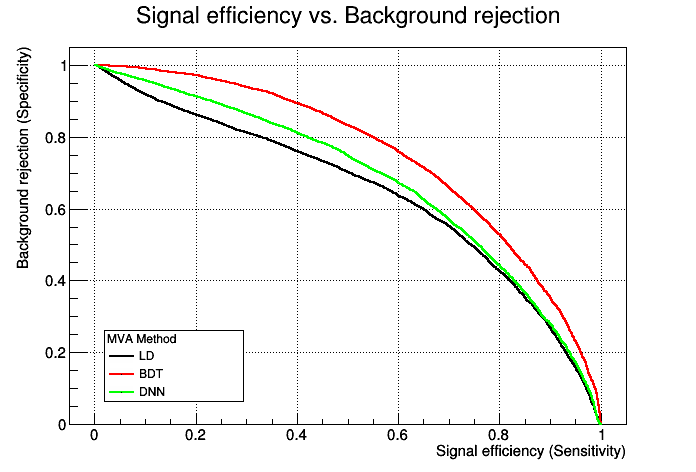

In [23]:
roc = factory.GetROCCurve(loader)
roc.Draw();

We can also get the integra of the ROC curve for some of the methods

In [24]:
print 'ROC integral for LD = ',factory.GetROCIntegral(loader, 'LD')

ROC integral for LD =  0.646664085


In [25]:
print 'ROC integral for BDT = ',factory.GetROCIntegral(loader, 'BDT')

ROC integral for BDT =  0.748682815


In [26]:
if (bookDNN) : print 'ROC integral for DNN = ',factory.GetROCIntegral(loader, 'DNN')

ROC integral for DNN =  0.679097375


## Draw Neural Network

If we trained a neural network then the weights of the network will be saved to XML and C file. 
We can read back the XML file and we can visualize the network using Factory.DrawNeuralNetwork function.

The arguments of this function:
<table>
<tr><th>Keyword</th><th>Can be used as positional argument</th><th>Default</th><th>Predefined values</th><th>Description</th></tr>
<tr>
    <td>datasetName</td>
    <td>yes, 1.</td>
    <td>-</td>
    <td>-</td>
    <td> The name of dataset</td>
</tr>
<tr>
    <td>methodName</td>
    <td>yes, 2.</td>
    <td>-</td>
    <td>-</td>
    <td> The name of method</td>
</tr>
</table>

This visualization will be interactive, and we can do the following with it:
* Mouseover (node, weight): focusing
* Zooming and grab and move supported
* Reset: double click

The synapses are drawn with 2 colors, one for positive weight and one for negative weight. The absolute value of the synapses are scaled and transformed to thickness of line between to node.

In [27]:
if (bookDNN):  factory.DrawNeuralNetwork(loader.GetName(), "DNN")